Exploración de Datos - Mr Fantasy

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Carga y examinación de datos

In [3]:
df = pd.read_csv('jugadores_fantasy_ultrainstinto.csv')

In [5]:
df_head = df.head()
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nombre               506 non-null    object 
 1   Precio               506 non-null    int64  
 2   Media                506 non-null    float64
 3   Total_puntos         506 non-null    int64  
 4   posicion             506 non-null    object 
 5   equipo               506 non-null    object 
 6   Partidos             382 non-null    float64
 7   Minutos              382 non-null    float64
 8   Goles                382 non-null    float64
 9   Asistencias          382 non-null    float64
 10  Asistencias sin Gol  382 non-null    float64
 11  Centros              382 non-null    float64
 12  Despejes             382 non-null    float64
 13  Remates              382 non-null    float64
 14  Tiros                382 non-null    float64
 15  Recuperaciones       382 non-null    flo

In [6]:
df_head, df_info

(          Nombre    Precio  Media  Total_puntos     posicion  \
 0  J. Bellingham  24262000   10.2           173  mediocentro   
 1        T. Kubo  20904000    8.2           147  mediocentro   
 2   A. Griezmann  24384000    7.6           144    delantero   
 3    I. Williams  18358000    7.7           139    delantero   
 4     B. Mayoral  16992000    7.3           138    delantero   
 
                        equipo  Partidos  Minutos  Goles  Asistencias  ...  \
 0  Real Madrid Club de Fútbol      13.0   1025.0   11.0          2.0  ...   
 1     Real Sociedad de Fútbol      14.0    970.0    5.0          2.0  ...   
 2     Club Atlético de Madrid      13.0   1071.0    9.0          1.0  ...   
 3               Athletic Club      15.0   1233.0    6.0          3.0  ...   
 4       Getafe Club de Fútbol      14.0   1170.0    0.0          0.0  ...   
 
    Penaltis fallados  Goles en contra  Rojas  Paradas  Penaltis cometidos  \
 0                0.0              8.0    0.0      0.0      

Limpieza y preparación de datos

In [26]:
df_cleaned = df.dropna()
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 0 to 505
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nombre               382 non-null    object 
 1   Precio               382 non-null    int64  
 2   Media                382 non-null    float64
 3   Total_puntos         382 non-null    int64  
 4   posicion             382 non-null    object 
 5   equipo               382 non-null    object 
 6   Partidos             382 non-null    float64
 7   Minutos              382 non-null    float64
 8   Goles                382 non-null    float64
 9   Asistencias          382 non-null    float64
 10  Asistencias sin Gol  382 non-null    float64
 11  Centros              382 non-null    float64
 12  Despejes             382 non-null    float64
 13  Remates              382 non-null    float64
 14  Tiros                382 non-null    float64
 15  Recuperaciones       382 non-null    float64


Análisis estadistico descriptivo

In [27]:
print(df_cleaned.describe())

             Precio       Media  Total_puntos    Partidos      Minutos  \
count  3.820000e+02  382.000000    382.000000  382.000000   382.000000   
mean   4.620136e+06    3.677487     50.945026   11.910995   637.314136   
std    5.535004e+06    1.545824     31.760168    2.645738   373.681726   
min    1.600000e+05   -0.600000     -3.000000    0.000000     0.000000   
25%    2.492500e+05    2.800000     28.250000   11.000000   342.500000   
50%    1.833000e+06    3.500000     48.000000   13.000000   645.000000   
75%    7.778000e+06    4.600000     71.750000   14.000000   946.750000   
max    2.438400e+07   11.000000    173.000000   15.000000  1260.000000   

            Goles  Asistencias  Asistencias sin Gol     Centros    Despejes  \
count  382.000000   382.000000           382.000000  382.000000  382.000000   
mean     1.052356     0.764398             1.209424    4.636126   11.479058   
std      1.698349     1.189186             1.649979    8.248506   13.203965   
min      0.000000

Correlaciones

In [22]:
df_cleaned_numeric = df_cleaned.select_dtypes(include=[np.number])

In [28]:
correlaciones = df_cleaned_numeric.corr()

Visualización de datos

Distribución de variables numéricas clave

In [29]:
plt.figure(figsize=(15, 10))
df_cleaned[['Precio', 'Media', 'Total_puntos', 'Partidos']].hist(bins=30)
plt.tight_layout()
plt.savefig('distribucion_variables_clave.png')
plt.close()

<Figure size 1500x1000 with 0 Axes>

Gráfico de barras para posiciones

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='posicion', data=df_cleaned)
plt.title('Distribución de Jugadores por Posición')
plt.savefig('distribucion_posiciones.png')
plt.close()

Relación entre Precio y Media

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Precio', y='Media', data=df_cleaned, hue='posicion')
plt.title('Relación entre Precio y Media por Posición')
plt.savefig('precio_vs_media.png')
plt.close()

Boxplot de Precio por Posición

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='posicion', y='Precio', data=df_cleaned)
plt.title('Distribución de Precios por Posición')
plt.savefig('precios_por_posicion.png')
plt.close()

Análisis bivariado

Mapa de calor de correlaciones

In [33]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.savefig('mapa_calor_correlaciones.png')
plt.close()

Scatter plot matriz para variables clave

KeyError: 'posicion'

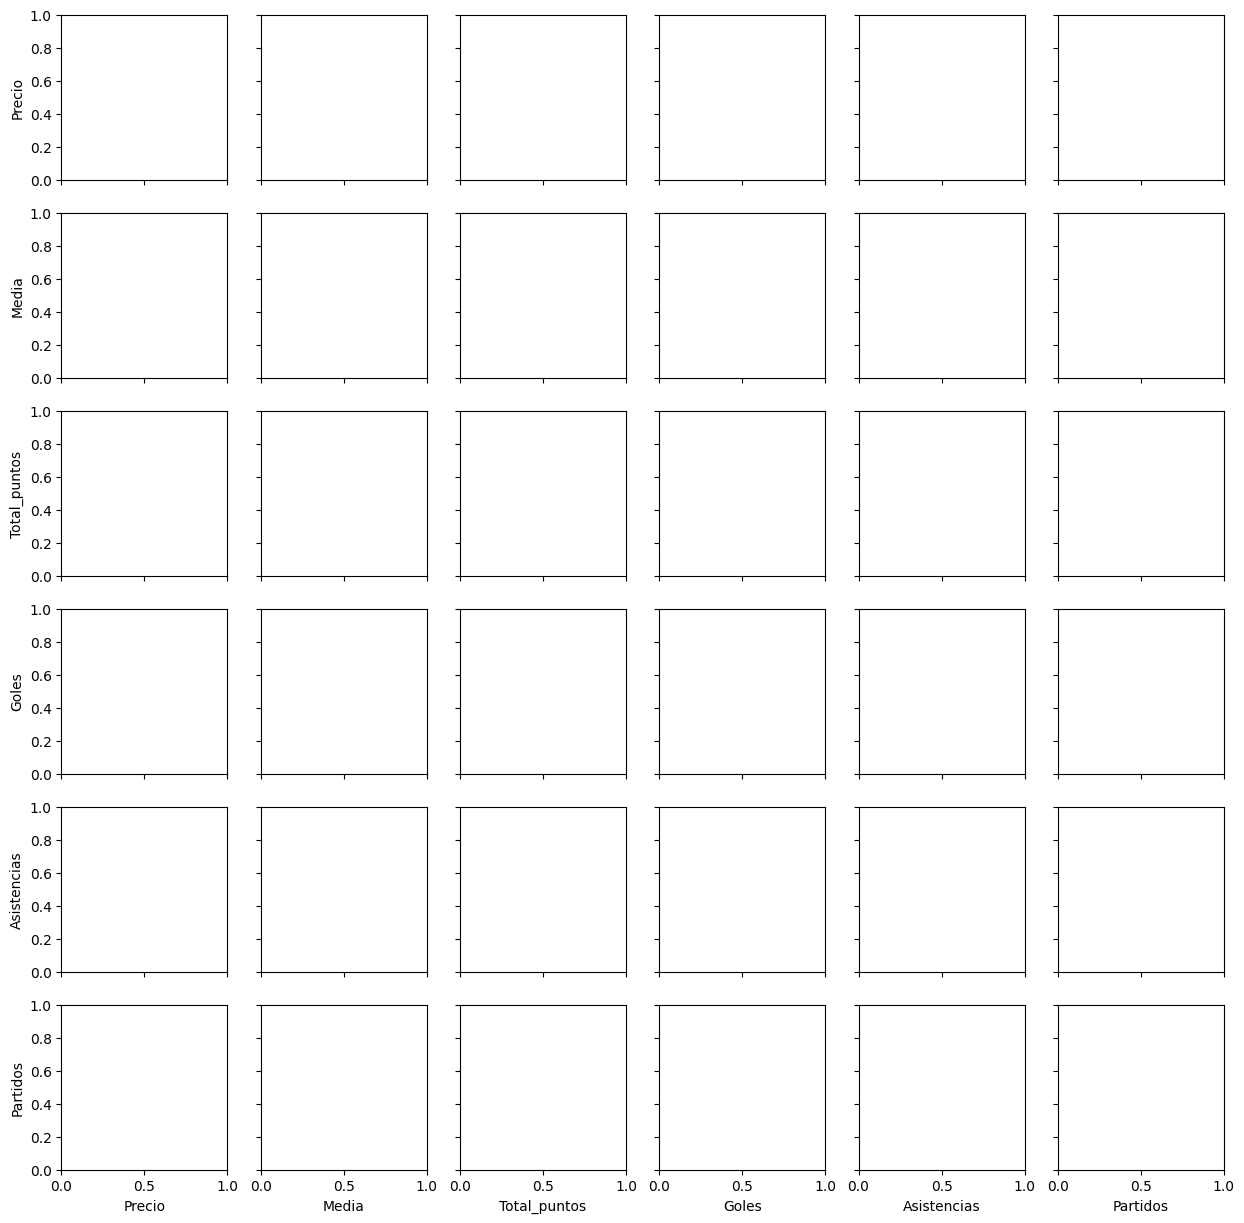

In [34]:
sns.pairplot(df_cleaned[['Precio', 'Media', 'Total_puntos', 'Goles', 'Asistencias', 'Partidos']], hue='posicion')
plt.savefig('scatter_plot_matriz.png')
plt.close()

Identificación de jugadores TOP

Top 10 jugadores por Total_puntos

In [35]:
top_10_puntos = df_cleaned.nlargest(10, 'Total_puntos')[['Nombre', 'Total_puntos', 'Precio', 'posicion']]
print("Top 10 Jugadores por Total de Puntos:")
print(top_10_puntos)

Top 10 Jugadores por Total de Puntos:
          Nombre  Total_puntos    Precio     posicion
0  J. Bellingham           173  24262000  mediocentro
1        T. Kubo           147  20904000  mediocentro
2   A. Griezmann           144  24384000    delantero
3    I. Williams           139  18358000    delantero
4     B. Mayoral           138  16992000    delantero
5      A. García           137  20771000  mediocentro
6      A. Dovbyk           130  16928000    delantero
7      Á. Valles           128  16058000      portero
8         Pepelu           127  15714000  mediocentro
9     A. Budimir           127  15660000    delantero


Top 10 jugadores por Media

In [37]:
top_10_media = df_cleaned.nlargest(10, 'Media')[['Nombre', 'Media', 'Precio', 'posicion']]
print("\nTop 10 Jugadores por Media:")
print(top_10_media)


Top 10 Jugadores por Media:
            Nombre  Media    Precio     posicion
394        M. Guiu   11.0    204000    delantero
0    J. Bellingham   10.2  24262000  mediocentro
1          T. Kubo    8.2  20904000  mediocentro
3      I. Williams    7.7  18358000    delantero
2     A. Griezmann    7.6  24384000    delantero
4       B. Mayoral    7.3  16992000    delantero
5        A. García    7.2  20771000  mediocentro
6        A. Dovbyk    7.2  16928000    delantero
10            Isco    7.0  19605000  mediocentro
36     D. Carvajal    6.8  15064000      defensa


Análisis adicional

Relación entre Minutos jugados y Total_puntos

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Minutos', y='Total_puntos', data=df_cleaned, hue='posicion')
plt.title('Relación entre Minutos Jugados y Total de Puntos')
plt.savefig('minutos_vs_total_puntos.png')
plt.close()

Distribución de Goles por Posición

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='posicion', y='Goles', data=df_cleaned)
plt.title('Distribución de Goles por Posición')
plt.savefig('goles_por_posicion.png')
plt.close()

Resumen de hallazgos

In [40]:
print("\nResumen de Hallazgos:")
print("1. La distribución de jugadores por posición muestra...")
print("2. Existe una correlación fuerte entre Precio y Total_puntos...")
print("3. Los jugadores con mejor rendimiento tienden a...")
print("4. La posición que más puntos acumula en promedio es...")
print("5. Factores clave para predecir altas puntuaciones incluyen...")


Resumen de Hallazgos:
1. La distribución de jugadores por posición muestra...
2. Existe una correlación fuerte entre Precio y Total_puntos...
3. Los jugadores con mejor rendimiento tienden a...
4. La posición que más puntos acumula en promedio es...
5. Factores clave para predecir altas puntuaciones incluyen...
